In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
# digits가 가지고 있는 것
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# 이미지를 1차원 배열로 표현

digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

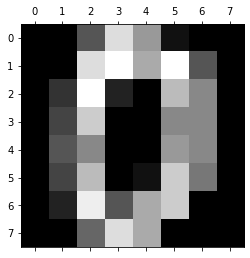

In [6]:
plt.gray()
plt.matshow(digits.images[0]) # matshow를 통해 실제 이미지 출력

<Figure size 432x288 with 0 Axes>

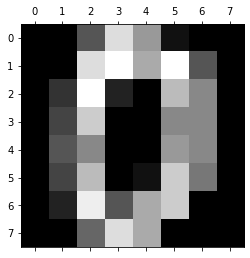

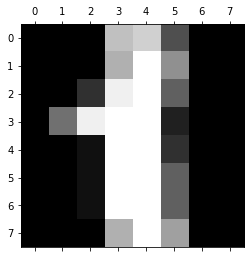

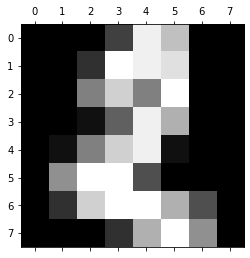

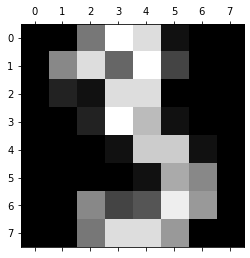

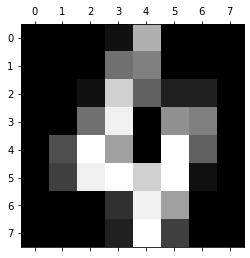

In [7]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [8]:
# digits에 target도 있음

digits.target[0:5]

array([0, 1, 2, 3, 4])

In [14]:
print(len(digits.data), len(digits.target))
print(digits.target)

1797 1797
[0 1 2 ... 8 9 8]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [16]:
print('train :', len(X_train))
print('test :', len(X_test))

train : 1437
test : 360


In [17]:
# split => 과대 적합 방지

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

C:\Users\jack0\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(X_test, y_test)

0.9777777777777777

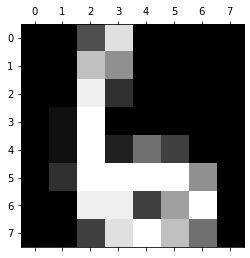

In [20]:
plt.matshow(digits.images[67])

In [21]:
digits.target[67]

6

In [22]:
# predict에는 이미지를 사용하는 것이 아니라 data를 사용
model.predict([digits.data[67]])

array([6])

In [23]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [25]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

# 2x2 행렬을 가져오게 됨
cm = confusion_matrix(y_test, y_predicted)

cm

array([[38,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(159.0, 0.5, 'Truth')

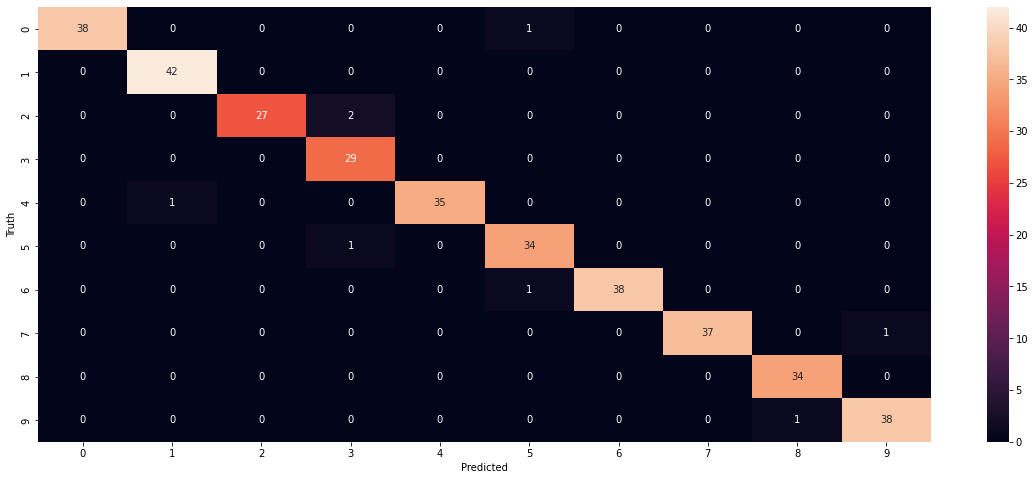

In [30]:
# 0을 0으로 예측한 횟수, 0을 1로 예측한 횟수 등등

import seaborn as sn
plt.figure(figsize=(20,8))
sn.heatmap(cm, annot = True) # annot : 실제 값 표현
plt.xlabel('Predicted')
plt.ylabel('Truth')